In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import cv2
from google.colab.patches import cv2_imshow

### Detecting Outliers

In [9]:
# plt.figure(figsize=(10,8),dpi=150)
# sns.displot(data = df, bins = 30)
# plt.xticks(rotation=45)

In [10]:
# plt.figure(figsize=(12,15),dpi=180)
# sns.boxplot(data = df)
# plt.xticks(rotation=45)

In [11]:
# df.describe()

In [12]:
# calculating IQR for saleprice
# df[(df[feature] < Q1 - threshold * IQR) | (df[feature] > Q3 + threshold * IQR)]
# iqr = 214000 - 129975
# lower_lim = 129975 - 1.5*iqr
# lower_lim
# higher_lim = 214000 + 2.5*iqr
# higher_lim

In [13]:
# df[df['SalePrice'] > higher_lim]

In [14]:
# z_scores = np.abs(stats.zscore(df['SalePrice']))
# z_scores

In [15]:
# threshold = 3
# outliers = df[z_scores > threshold]
# outliers

In [16]:
# null = df.isnull().sum()
# null_df = null[null != 0].to_frame()
# null_df

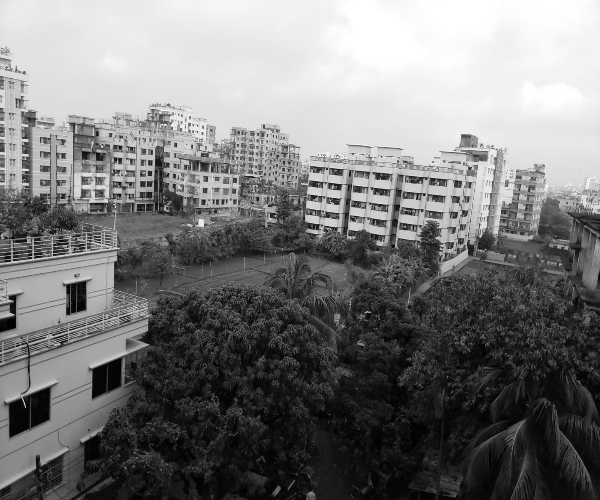

In [17]:
image = cv2.imread('/content/WhatsApp Image 2023-12-08 at 9.41.23 AM (1).jpeg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (600, 500))
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

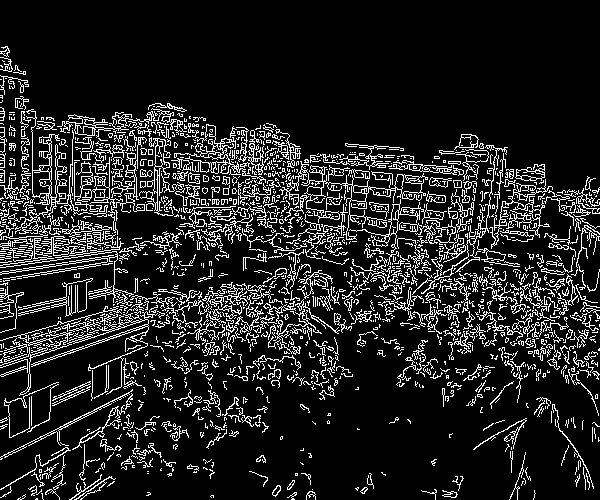

In [18]:
if image is not None:
    edges = cv2.Canny(image, 100, 200)
    cv2_imshow(edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Image not found or couldn't be loaded.")

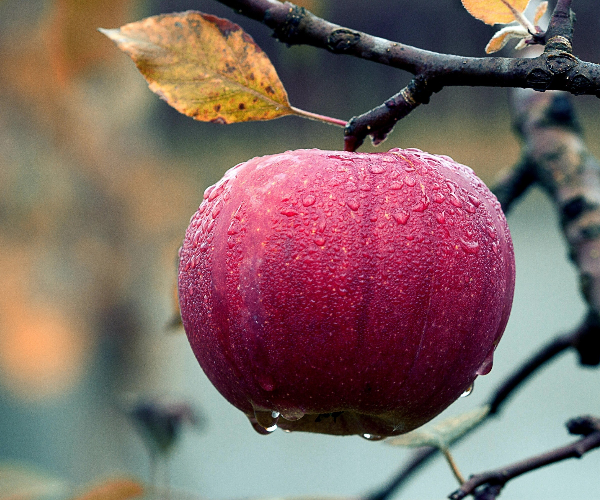

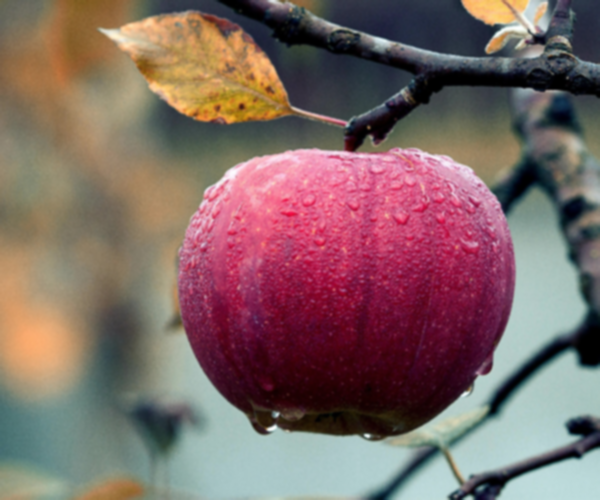

In [19]:
#Denosing image

image2 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
image2 = cv2.resize(image2, (600, 500))

#Gaussian blur to denoise the image
denoised_image = cv2.GaussianBlur(image2, (5, 5), -1)

cv2_imshow( image2)
cv2_imshow(denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


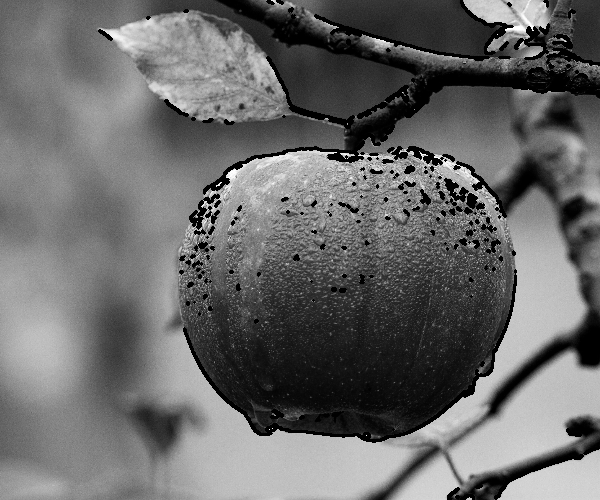

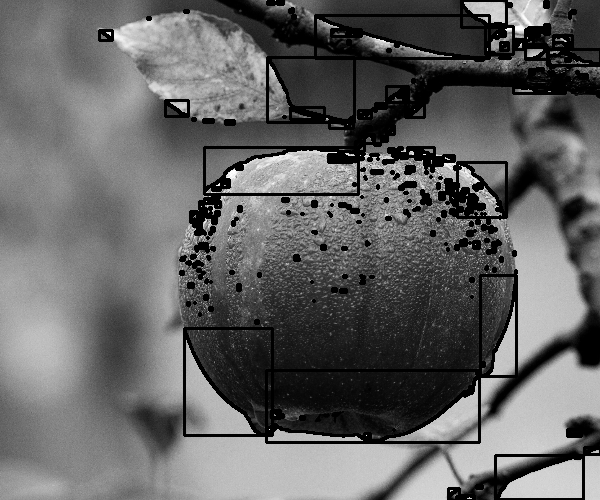

In [45]:
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
image2 = cv2.resize(image2,(600,500))
image2_edge = cv2.Canny(image2,400,500)
contours, hierarchy  = cv2.findContours(image2_edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(hierarchy)
image_with_contours = image2.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
cv2_imshow(image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

# image with bounding box
for contour in contours:
    # Get the bounding rectangle for each contour
    x, y, w, h = cv2.boundingRect(contour) #i.g Contour 1: (x=50, y=70, width=100, height=120)

    # Draw the bounding box rectangle on the image
    cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (0, 0, 255), 2)
cv2_imshow(image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()
# ima = cv2.imwrite('image.jpg',image_with_contours)

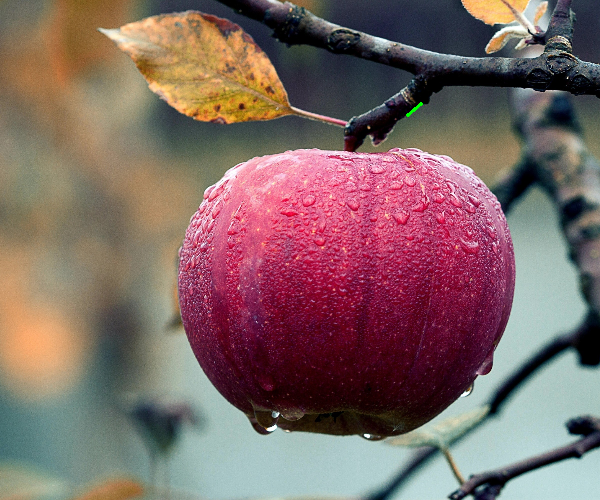

In [44]:

# Read and resize the image
image2 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
image2 = cv2.resize(image2, (600, 500))

gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Hough Line Transform for line detection
lines = cv2.HoughLinesP(edges,1,np.pi/180, 50, 100, 10)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(image2,(x1,y1),(x2,y2),(0,255,0),2)
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

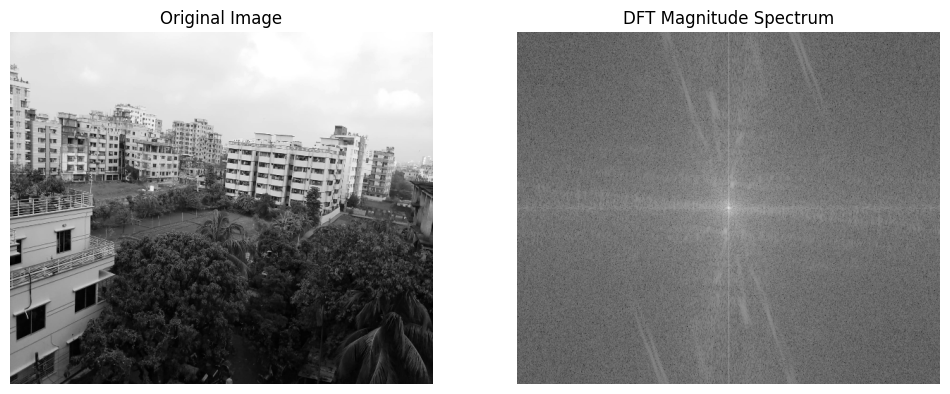

In [22]:
# Perform Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum (logarithmic scale for better visualization)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the original image and its DFT magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')
plt.show()

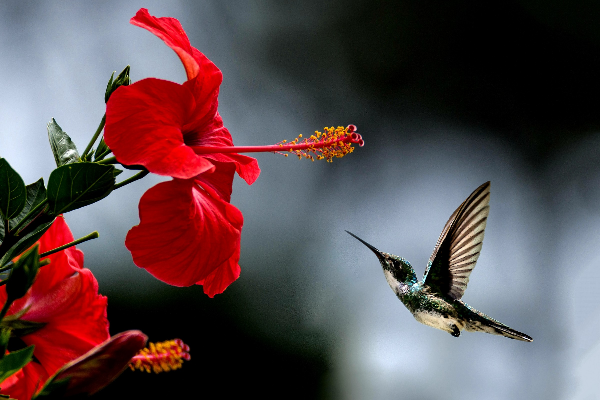

In [23]:
im3 = cv2.imread('/content/20190803_101711_optimized.jpg')
im3 = cv2.resize(im3,(600,400))
cv2_imshow(im3)
cv2.waitKey(0)
cv2.destroyAllWindows()

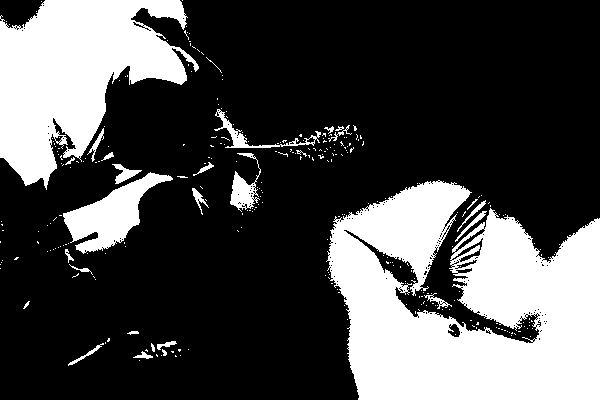

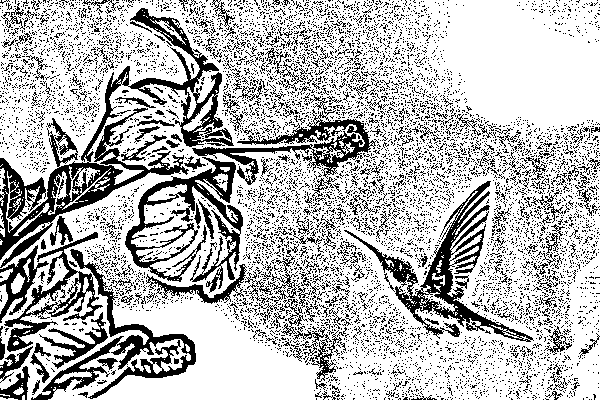

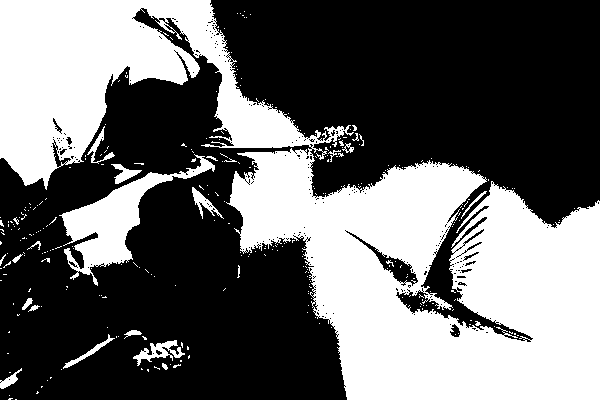

In [36]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

# Binary Thresholding
_, binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
cv2_imshow(binary_threshold)
cv2_imshow(adaptive_threshold)
cv2_imshow(otsu_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

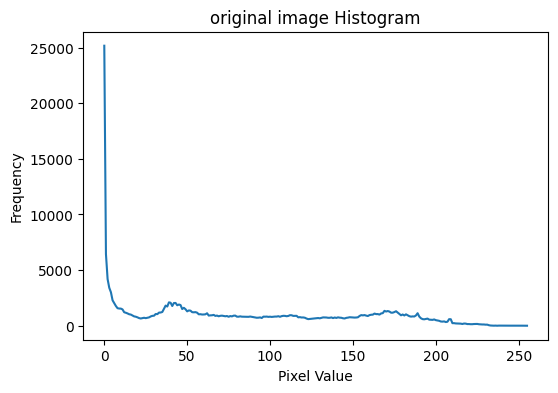

In [24]:
im4 = im3.copy()
im4_gray = cv2.cvtColor(im4,cv2.COLOR_BGR2GRAY)
# Calculate histogram
hist = cv2.calcHist([im4_gray], [0], None, [256], [0, 256])
plt.figure(figsize=(6, 4))
plt.plot(hist)
plt.title('original image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

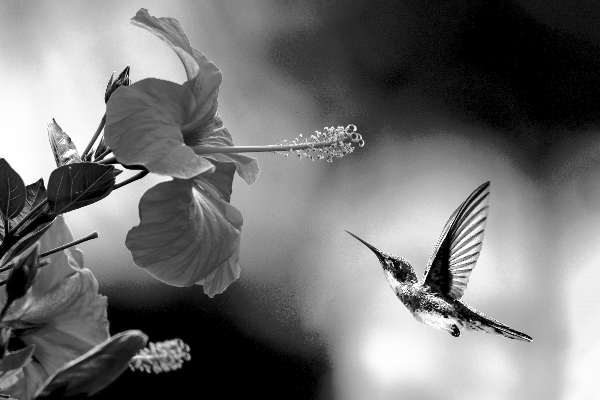

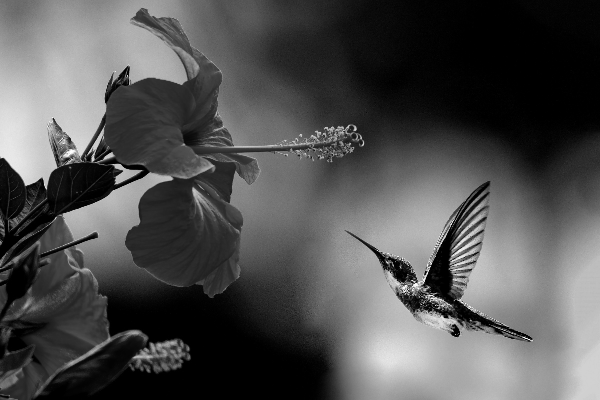

In [25]:
# Apply histogram equalization to grayscale image
equalized_image = cv2.equalizeHist(im4_gray)
cv2_imshow(equalized_image)
cv2_imshow(im4_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


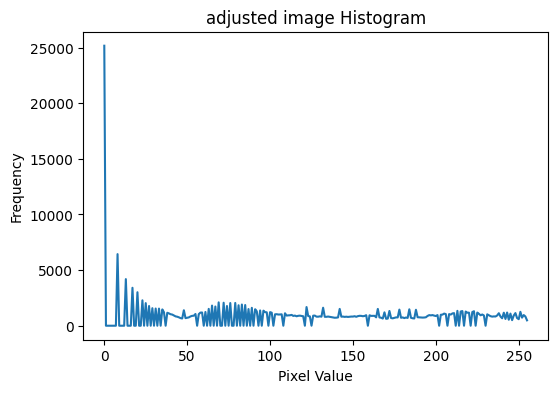

In [26]:
hist2 = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.figure(figsize=(6, 4))
plt.plot(hist2)
plt.title('adjusted image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

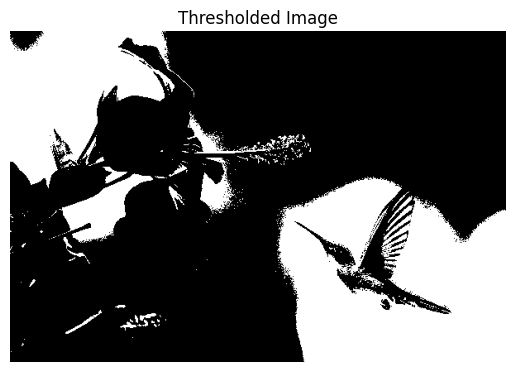

In [27]:
threshold_value = 120
# Apply thresholding
_, thresholded_img = cv2.threshold(im4_gray, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_img, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

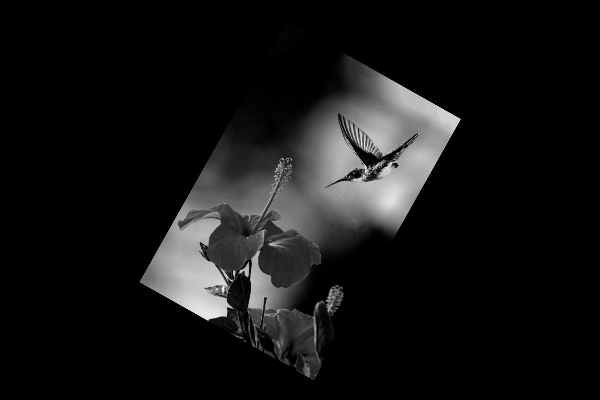

In [28]:
# Rotate an image
rows, cols = im4_gray.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 60.58, 0.5)
rotated_image = cv2.warpAffine(im4_gray, rotation_matrix, (cols, rows))
cv2_imshow(rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

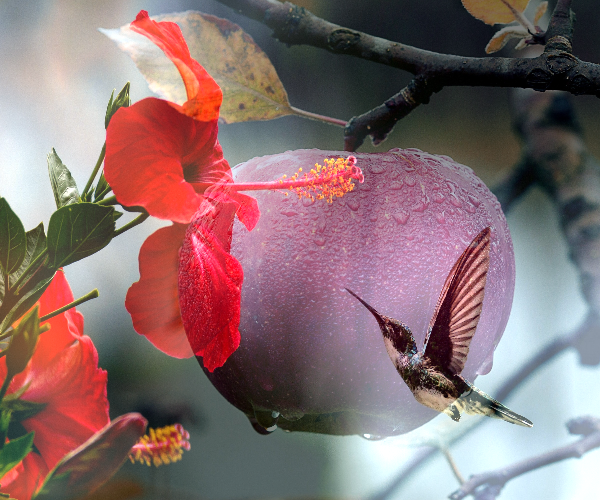

In [29]:
# Read the two images
ima1 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
ima2 = cv2.imread('/content/20190803_101711_optimized.jpg')

# Resize image2 to match the dimensions of image1 (optional, if needed)
ima2 = cv2.resize(ima2, (ima1.shape[1], ima1.shape[0]))

# Blending the images (using equal weightage for both images)
alpha = 0.5  # Weight for the first image
beta = 0.8   # Weight for the second image
gamma = 0    # Scalar added to each sum
blended_image = cv2.addWeighted(ima1, alpha, ima2, beta, gamma)
blended_image = cv2.resize(blended_image,(600,500))

# Display the blended image
cv2_imshow(blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


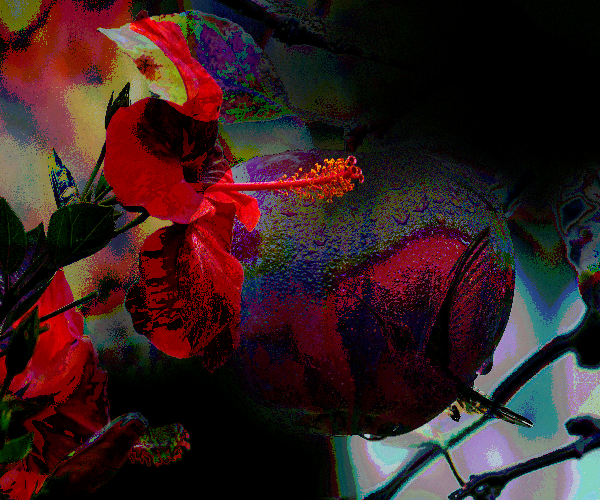

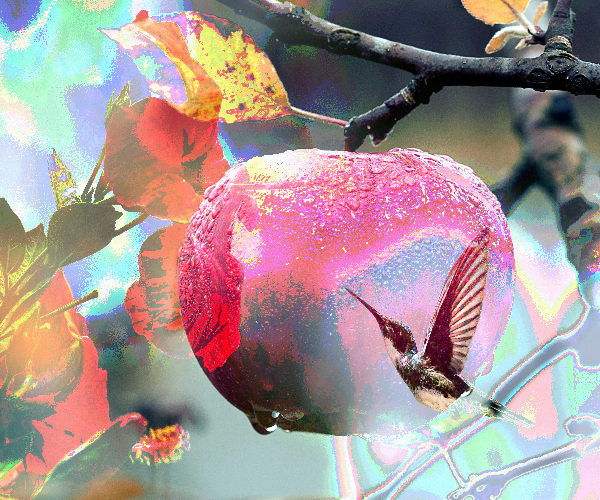

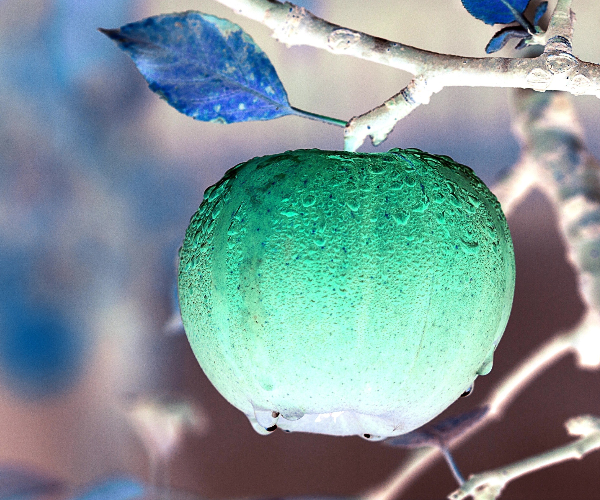

In [30]:
#Bitwise operation
ima1 = cv2.resize(ima1,(600,500))
ima2 = cv2.resize(ima2,(600,500))
bitwise_and = cv2.bitwise_and(ima1, ima2) #Highlights common areas or features present in both images.
bitwise_or = cv2.bitwise_or(ima1, ima2) #Combines areas or features present in either image.
bitwise_not = cv2.bitwise_not(ima1)

# Display the results of bitwise operations
cv2_imshow(bitwise_and)
cv2_imshow(bitwise_or)
cv2_imshow(bitwise_not)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Object segmentation usuing GrabCut Algorithm:

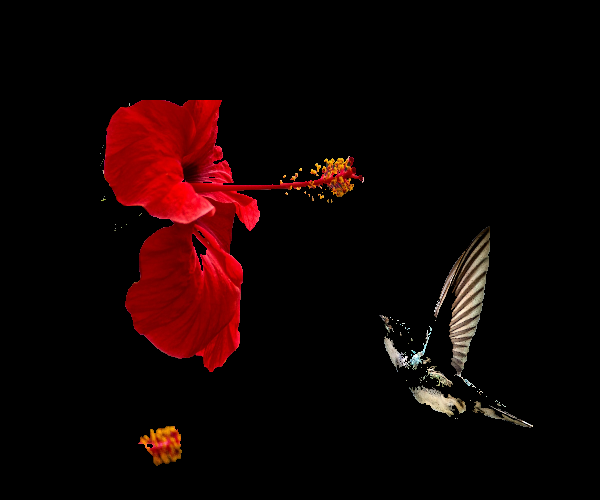

In [35]:
# Read the image
image5 = cv2.imread('/content/20190803_101711_optimized.jpg')
image5 = cv2.resize(image5,(600,500))

# Define a rectangle around the object you want to segment
rect = (100, 100, 450, 450)  # Format: (x, y, width, height)

# Initialize the mask
mask = np.zeros(image5.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image5, mask, rect, bgd_model, fgd_model, iterCount=6, mode=cv2.GC_INIT_WITH_RECT)

# Create a mask where 0 and 2 are considered the background and the rest as foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image5
result = image5 * mask2[:, :, np.newaxis]

# Display the segmented object
cv2_imshow( result)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Object segmentation usuing Watershed Algorithm:

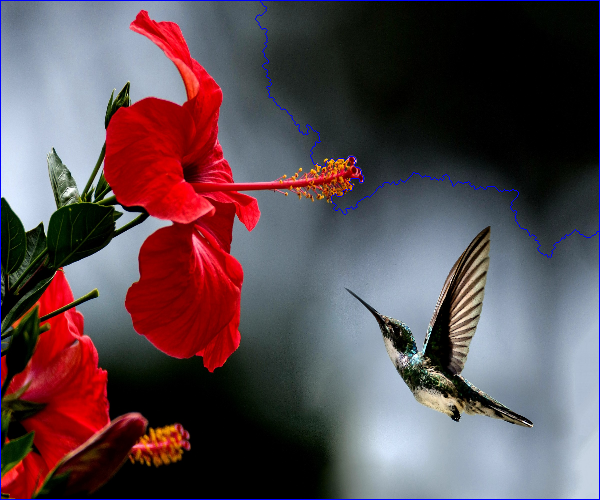

In [32]:
image5 = cv2.imread('/content/20190803_101711_optimized.jpg')
image5 = cv2.resize(image5,(600,500))

# Convert the image to grayscale
gray = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)

# Apply thresholding or any preprocessing as needed
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify areas where we are uncertain
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Create markers for watershed algorithm
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image5, markers)
image5[markers == -1] = [255, 0, 0]  # Mark boundary regions with blue color

# Display the segmented image5
cv2_imshow( image5)
cv2.waitKey(0)
cv2.destroyAllWindows()
